In [6]:
from pathlib import Path
import numpy as np
from dataclasses import dataclass
from skimage.metrics import peak_signal_noise_ratio
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [29]:
def evaluate(pred: np.ndarray, target: np.ndarray) -> dict:
    return {
        "psnr": peak_signal_noise_ratio(pred, target, data_range=target.max()),
        "mae": np.mean(np.absolute(pred - target))
    }

def compute_all(target: np.ndarray, dir: str) -> pd.DataFrame:
    results = []
    for file in Path(dir).iterdir():
        
        phi, s = file.stem.split("_")
        phi, s = int(phi[3:]), int(s[1:])
        
        arr = np.load(file)
        metrics = [evaluate(p, t) for p, t in zip(arr, target)]
        psnr = np.array([m["psnr"] for m in metrics])
        mae = np.array([m["mae"] for m in metrics])
        results.append({
            "phi": phi,
            "s": s,
            "psnr_mean": psnr.mean(),
            "psnr_std": psnr.std(),
            "mae_mean": mae.mean(),
            "mae_std": mae.std(),
        })
    return pd.DataFrame(results)
    

print("Loading target")
target = np.load("../datasets/rfi/sim-test-target.npy")

Loading target


# Grid Search Results

In [42]:
df_noise = compute_all(target, "../workspace/grid-search/pred/noise")
df_zero = compute_all(target, "../workspace/grid-search/pred/zero")
df_mean = compute_all(target, "../workspace/grid-search/pred/mean")

<Axes: title={'center': 'Zero'}, xlabel='s', ylabel='phi'>

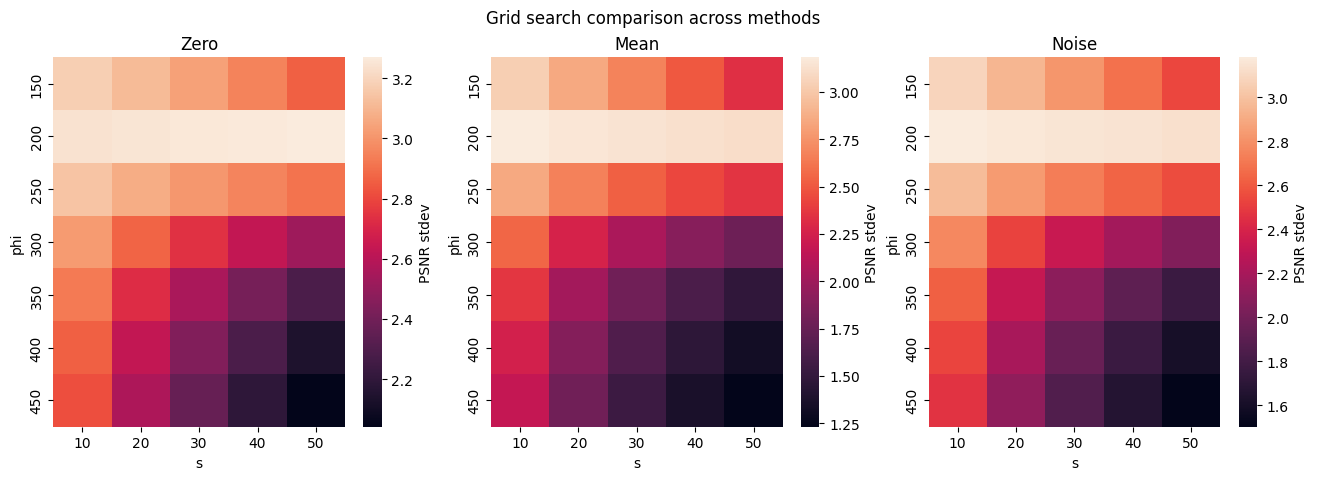

In [64]:
colname="psnr_std"
label="PSNR stdev"
pivot_noise = df_noise.pivot(index="phi", columns="s", values=colname)
pivot_mean = df_mean.pivot(index="phi", columns="s", values=colname)
pivot_zero = df_zero.pivot(index="phi", columns="s", values=colname)

fig, ax = plt.subplots(ncols=3)
fig.set_figwidth(16)
fig.suptitle("Grid search comparison across methods")

ax[2].set_title("Noise")
sns.heatmap(pivot_noise, ax=ax[2], cbar_kws={"label": label})

ax[1].set_title("Mean")
sns.heatmap(pivot_mean, ax=ax[1], cbar_kws={"label": label})

ax[0].set_title("Zero")
sns.heatmap(pivot_zero, ax=ax[0], cbar_kws={"label": label})

In [65]:
params_noise = pivot_noise[pivot_noise.max().idxmax()].idxmax(), pivot_noise.max().idxmax()
params_mean = pivot_mean[pivot_mean.max().idxmax()].idxmax(), pivot_mean.max().idxmax()
params_zero = pivot_zero[pivot_zero.max().idxmax()].idxmax(), pivot_zero.max().idxmax()

print(params_noise)
print(params_mean)
print(params_zero)

(np.int64(200), np.int64(10))
(np.int64(200), np.int64(10))
(np.int64(200), np.int64(50))


In [66]:
params_noise = pivot_noise[pivot_noise.min().idxmin()].idxmin(), pivot_noise.min().idxmin()
params_mean = pivot_mean[pivot_mean.min().idxmin()].idxmin(), pivot_mean.min().idxmin()
params_zero = pivot_zero[pivot_zero.min().idxmin()].idxmin(), pivot_zero.min().idxmin()

print(params_noise)
print(params_mean)
print(params_zero)

(np.int64(450), np.int64(50))
(np.int64(450), np.int64(50))
(np.int64(450), np.int64(50))
